# Text Data Problem Set

<span style="color:red">0 / 0 points</span>.

In [1]:
# This code cell will be in every one of our chapters in Jupyter Notebook
# The function allows you to see every line of output when the code has multiple lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Load packages
import pandas as pd
import matplotlib.pyplot as plt

## Programming

1. Read in the housing.csv file from `problem_sets/control_structures/` and name it `housing`. If you remember, the `CITY` variables all have the word 'city' attached to the end of the actual city name, i.e.: 'Miami city, Boise City city, Santa Fe city' etc.
    - Use regex and string functions to extract the clean city name from `CITY` and update the values of the `CITY` variable.
    - Use [regex101](https://regex101.com) and Dave Child's [regex cheat sheet](https://cheatography.com/davechild/cheat-sheets/regular-expressions/) for reference.

In [2]:
housing = pd.read_csv('../control_structures/housing.csv')

In [3]:
housing['CITY'] = housing['CITY'].str.extract(r'(.+)\scity$', expand=False)

2. Show the fruits of your labor: Re-create the plot 'Vacant Properties - Top Ten Cities in California' from the Data Visualization chapter. The city names should no longer have the string 'city' at the end. (You will need to subset housing to observations where `STATE` = California and `YEAR` = 2022)

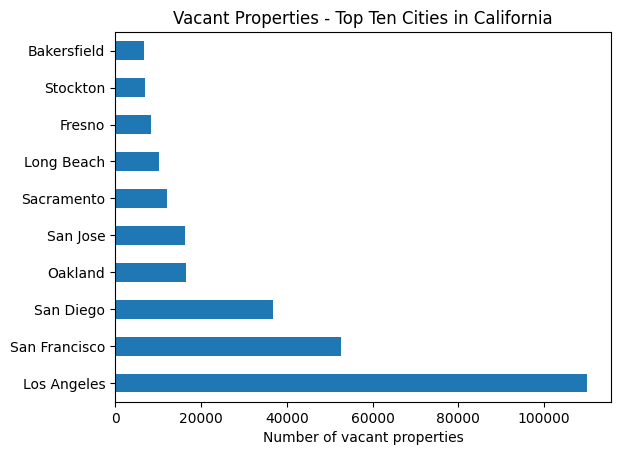

In [4]:
# subset new df
df = housing[(housing['STATE']=='California')&(housing['YEAR']==2022)][['VACANT','CITY']].sort_values(by='VACANT', ascending=False).head(10)

#plot
df.plot(x='CITY', kind='barh')
plt.title('Vacant Properties - Top Ten Cities in California')
plt.legend('', frameon=False)
plt.ylabel('')
plt.xlabel('Number of vacant properties');

3. Read in the Central America CSV file inside of the `DATA/ACLED/` folder and name the new dataframe `central_america`. Imagine you wish to find conflicts between government forces and organized crime. You do not want conflicts between gangs or against civilians. Using string functions, search for events that involved either a 'cartel' _or_ a 'gang', __and__ military forces (_either_ army, navy, air force, armed forces, or police).

4. With the subset of the data you created using the above search conditions from question 3, display what unique values of `event_type` were most common when gangs and armed forces were involved. 

In [2]:
central_america = pd.read_csv('../../Data/ACLED/1900-01-01-2022-04-22-Central_America.csv')

central_america[(central_america['notes'].str.contains('cartel|gang')) & (central_america['notes'].str.contains('army|navy|air force|armed forces|police|military'))]['notes']

central_america[(central_america['notes'].str.contains('cartel|gang')) & (central_america['notes'].str.contains('army|navy|air force|armed forces|police|military'))]['event_type'].value_counts()

1        On 15 April 2022, in San Lorenzo, San Ildefons...
14       On 11 April 2022, in San Salvador department, ...
21       Around 11 April 2022 (between 8 - 11 April), i...
38       Security measures: On 8 April 2022, in Tegucig...
75       Security measures: On 7 April 2022, in San Ped...
                               ...                        
17169    On 7 January 2018, in San Sebastian municipali...
17172    On 7 January 2018, in canton El Guayabo, Sonso...
17186    On 5 January 2018, in Primavera, La Libertad, ...
17188    On 5 January 2018, in Mejicanos, an armed clas...
17189    On 5 January 2018, in Aguilares, San Salvador,...
Name: notes, Length: 924, dtype: object

event_type
Battles                       574
Violence against civilians    234
Strategic developments        106
Riots                           4
Explosions/Remote violence      4
Protests                        2
Name: count, dtype: int64

5. Create an object called `date` and assign it this exact string value: `99 31 dec`

In [6]:
date = '99, 31 dec'
date

'99, 31 dec'

6. Transform the `date` string into a datetime object, with assignment. You can refer to this [manual](https://4js.com/online_documentation/fjs-fgl-3.00.05-manual-html/c_fgl_DataConversions_format_datetimes.html) to parse the string's format into datetime.

In [7]:
date = pd.to_datetime(date, format='%y, %d %b')
date

Timestamp('1999-12-31 00:00:00')

7. Turn the `date` object into a new string with the format `Friday. December 31, 1999`, _without_ assignment.

In [8]:
date.strftime('%A. %B. %d, %Y')

'Friday. December. 31, 1999'

8. Turn the `date` object into another new string with the format `12-31-99`, _without_ assignment.

In [15]:
date.strftime('%m-%d-%y')

'12-31-99'

9. From the `central_america` dataframe, display every unique value of the `actor1` variable.

In [10]:
pd.options.display.max_colwidth = 30 # this option lets you read some number of characters in the cell output.
set(central_america['actor1'])

{'APN: Nicaraguan Patriotic Alliance',
 'Ander Gang',
 'B-18 (R): Barrio-18 (Revolucionarios)',
 'B-18 (S): Barrio-18 (Surenos)',
 'B-18: Barrio-18',
 'Bak-a-Town Gang',
 'Bastion del Sur',
 'Benjamin Gang',
 'CJNG: Jalisco New Generation Cartel',
 'Chepe Rodas Gang',
 'Chirijox Communal Militia (Guatemala)',
 'Civilians (El Salvador)',
 'Civilians (Honduras)',
 'Civilians (International)',
 'Civilians (Nicaragua)',
 'El Combo Que No Se Deja Gang',
 'El Margaro Gang',
 'El Pastate Communal Militia (Honduras)',
 'FSLN: Sandinista National Liberation Front',
 'Garifuna Indigenous Militia (Honduras)',
 'George Street Gang',
 'Government of Belize (2008-2020)',
 'Government of Belize (2020-)',
 'Government of Costa Rica (2014-)',
 'Government of El Salvador (2019-)',
 'Government of Guatemala (2016-2020)',
 'Government of Guatemala (2020-)',
 'Government of Honduras (2010-2022)',
 'Government of Honduras (2022-)',
 'Government of Nicaragua (2007-)',
 'Government of Panama (2019-)',
 'Guana

10. The variable for the main actor, `actor1`, sometimes includes text in parentheses, sometimes not. Extract the clean string value without the parenthetical text using regular expressions to a new `clean_actors` object.
    - You should use a list comprehension with an if-else condition to check for parentheticals. If there is text within parentheses, extract the name of the actor. Otherwise, use the value of `actor1` as-is.
    - The `i` iteration object should be every `i in central_america['actor1']` instead of a range of numbers, because it makes the list comprehension _much_ faster.
    - The `i` iteration object needs to be a `pd.Series()` object for `.str` functions to work, so wrap it in the `pd.Series()` command. Series get assigned an index number and that number appears in your new list, so use a simple `[0]` subset after each `pd.Series()` object to extract a value without an index number.
    - Assign `clean_actors` to a new variable in `central_america` with the same name. Check your work by displaying the first ten observations of `central_america`.
    - Like question nine, display every unique value of `central_america['clean_actors']`.

In [11]:
clean_actors = [pd.Series(i).str.extract(r'(.+)\s\(.+\)', expand=False)[0] if pd.Series(i).str.contains(r'\(.+\)')[0]
 else pd.Series(i)[0] for i in central_america['actor1']]

In [12]:
pd.options.display.max_colwidth = 30 # this option lets you read some number of characters in the cell output.

# assign and check
central_america['clean_actors'] = clean_actors
central_america.head(10)
set(central_america['clean_actors'])

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3,clean_actors
0,9103846,340,HND4558,4558,15 April 2022,2022,2,Battles,Armed clash,Unidentified Armed Group (...,...,14.0818,-87.2068,1,El Heraldo (Honduras),National,Around 15 April 2022 (as r...,1,1650294269,HND,Unidentified Armed Group
1,9103881,222,SLV3321,3321,15 April 2022,2022,1,Battles,Armed clash,Unidentified Gang (El Salv...,...,13.6135,-88.5698,1,El Salvador.com,National,"On 15 April 2022, in San L...",1,1650294269,SLV,Unidentified Gang
2,9103883,591,PAN1916,1916,13 April 2022,2022,1,Protests,Peaceful protest,Protesters (Panama),...,8.9936,-79.5197,1,El Siglo (Panama),National,"On 13 April 2022, in Panam...",0,1650294269,PAN,Protesters
3,9103717,340,HND4559,4559,12 April 2022,2022,1,Violence against civilians,Attack,Unidentified Armed Group (...,...,14.5504,-86.6610,1,HCH; Once Noticias,National,"On 12 April 2022, in Campa...",0,1650294269,HND,Unidentified Armed Group
4,9103813,558,NIC769,769,12 April 2022,2022,1,Strategic developments,Arrests,Police Forces of Nicaragua...,...,12.1328,-86.2504,1,Confidencial,National,"On 12 April 2022, in Manag...",0,1650294269,NIC,Police Forces of Nicaragua
5,9103814,591,PAN1917,1917,12 April 2022,2022,1,Protests,Peaceful protest,Protesters (Panama),...,7.9071,-80.6129,1,Critica (Panama),National,"On 12 April 2022, in Pese,...",0,1650294269,PAN,Protesters
6,9103816,591,PAN1919,1919,12 April 2022,2022,1,Protests,Peaceful protest,Protesters (Panama),...,8.9936,-79.5197,1,Critica (Panama),National,"On 12 April 2022, in Panam...",0,1650294269,PAN,Protesters
7,9103955,340,HND4569,4569,12 April 2022,2022,1,Protests,Peaceful protest,Protesters (Honduras),...,15.7743,-87.4673,1,La Tribuna (Honduras),National,"On 12 April 2022, in Atlan...",0,1650294269,HND,Protesters
8,9104022,320,GTM5016,5016,12 April 2022,2022,1,Battles,Armed clash,Unidentified Armed Group (...,...,15.8278,-88.7535,2,Prensa Libre (Guatemala),National,"On 12 April 2022, in Livin...",0,1650294269,GTM,Unidentified Armed Group
9,9103719,340,HND4561,4561,11 April 2022,2022,1,Violence against civilians,Attack,Unidentified Armed Group (...,...,14.5776,-87.7268,2,HCH; El Heraldo (Honduras),National,"On 11 April 2022, near El ...",1,1650294269,HND,Unidentified Armed Group


{'APN: Nicaraguan Patriotic Alliance',
 'Ander Gang',
 'B-18 (R): Barrio-18',
 'B-18 (S): Barrio-18',
 'B-18: Barrio-18',
 'Bak-a-Town Gang',
 'Bastion del Sur',
 'Benjamin Gang',
 'CJNG: Jalisco New Generation Cartel',
 'Chepe Rodas Gang',
 'Chirijox Communal Militia',
 'Civilians',
 'El Combo Que No Se Deja Gang',
 'El Margaro Gang',
 'El Pastate Communal Militia',
 'FSLN: Sandinista National Liberation Front',
 'Garifuna Indigenous Militia',
 'George Street Gang',
 'Government of Belize',
 'Government of Costa Rica',
 'Government of El Salvador',
 'Government of Guatemala',
 'Government of Honduras',
 'Government of Nicaragua',
 'Government of Panama',
 'Guanacos Criminales Salvatruchos Gang',
 'Guaricayan Gang',
 'Ixcan Communal Militia',
 'La Rumba Gang',
 'Lela Chanco Communal Militia',
 'Los Aguacates Gang',
 'Los Angeles Justicieros',
 'Los Benitez Vasquez Gang',
 'Los Bernillos Gang',
 'Los Cadejos Gang',
 'Los Campesinos Gang',
 'Los Canechos Gang',
 'Los Capulina Gang',
 'Lo



11. You will make a new variable in the `central_america` datafrime that is a sentence in natural English. This sentence will be a concatenation of the string values in several different columns in the data plus your own words. The sentence should read like this:

    `On [date], [an/the/... actors was/were] involved in [conflict event] in the [region] region of [country].`

    Your first step is to make a new variable that places 'an/the/...' and 'was/were' before and after the actor, based on the values of the strings inside `clean_actors`. There are three conditions:
    1. First make a variable named `actors` that concatenates the string `the ` plus any value of `clean_actor` plus ` were`. The new variable should 'the [Organization X] were'. Do not worry if there are some grammar mistakes. The next steps will replace those.
    2. Using conditional replacement, replace any values in `actors` if the string in `clean_actor` ends with an `s` (use regex). Turn the entire new string to lowercase. Also add the string ` were` to the end so that it reads 'actors were'.
    3. Using conditional replacement, replace any values in `actors` when the string in `clean_actor` starts with the string `Unidentified` (regex or a literal search both work). Turn this entire new string to lowercase as well. Add strings `an ` plus the lowercase value of `clean_actor` plus the string ` was` so that it reads 'an unidentified actor was'.

    Display the first seven observations of `central_america[['actor1', 'clean_actors', 'actors']]`

In [16]:
central_america['actors'] = 'the ' + central_america['clean_actors'] + ' were'
central_america.loc[central_america['clean_actors'].str.contains(r's$'), 'actors'] = central_america['clean_actors'].str.lower()+ ' were'
central_america.loc[central_america['clean_actors'].str.contains(r'^Unidentified'), 'actors'] = 'an ' + central_america['clean_actors'].str.lower() + ' was'

pd.options.display.max_colwidth = 100 # this option lets you read some number of characters in the cell output.
central_america[['actor1', 'clean_actors', 'actors']].head(7)

,actor1,clean_actors,actors
0,Unidentified Armed Group (Honduras),Unidentified Armed Group,an unidentified armed group was
1,Unidentified Gang (El Salvador),Unidentified Gang,an unidentified gang was
2,Protesters (Panama),Protesters,protesters were
3,Unidentified Armed Group (Honduras),Unidentified Armed Group,an unidentified armed group was
4,Police Forces of Nicaragua (2007-),Police Forces of Nicaragua,the Police Forces of Nicaragua were
5,Protesters (Panama),Protesters,protesters were
6,Protesters (Panama),Protesters,protesters were


12. Make the entire concatenated sentence we mentioned in question 11 in a new variable named `sentence`. The variable for conflict event is capitalized, but your sentence should make it lowercase. Change the cell display width to 300 (`pd.options.display.max_colwidth = 300`), in order to display `sentence` and `notes` side by side as a two-column table. 

In [14]:
central_america['sentence'] = 'On ' + central_america['event_date'] + ', ' + central_america['actors'] + ' involved in ' +  central_america['event_type'].str.lower() + ' in the ' + central_america['admin1'] + ' region of ' + central_america['country']

pd.options.display.max_colwidth = 300 # this option lets you read some number of characters in the cell output.
pd.concat([central_america['sentence'],central_america['notes']],axis=1)

,sentence,notes
0,"On 15 April 2022, an unidentified armed group was involved in battles in the Francisco Morazan region of Honduras","Around 15 April 2022 (as reported), in Tegucigalpa, Francisco Morazan, a member of the Barrio 18 gang was killed and his body was found hanging off a bridge in the colonia Nueva Suyapa. The exact reason for the killing is unknown. 1 fatality."
1,"On 15 April 2022, an unidentified gang was involved in battles in the San Vicente region of El Salvador","On 15 April 2022, in San Lorenzo, San Ildefonso, San Vicente, there was an armed clash between police and military forces against members of an unidentified gang. Security forces were patrolling an area, when a group of five gang members opened fire on them. As a result, one gang member was kill..."
2,"On 13 April 2022, protesters were involved in protests in the Panama region of Panama","On 13 April 2022, in Panama City, Panama, members of the Association of Employees of the Social Security Fund (AECSS) and the National Association of Administrative Officials (ANFACSS) closed traffic on the Transistmica road, in front of the Dr. Arnulfo Arias Madrid hospital complex, in protest...."
3,"On 12 April 2022, an unidentified armed group was involved in violence against civilians in the Olancho region of Honduras","On 12 April 2022, in Campamento, Olancho, two unidentified armed men arrived on a motorcycle and shot an entrepreneur selling bricks as he was seated in his truck. The reason for the attack is unknown. The victim emerged unscathed from the attack. There were no casualties."
4,"On 12 April 2022, the Police Forces of Nicaragua were involved in strategic developments in the Managua region of Nicaragua","On 12 April 2022, in Managua, Managua, police forces arrested four musicians for their political opposition against the regime of Daniel Ortega and Rosario Murillo. The arrests happened amid an ongoing government crackdown against opposition which has intensified with the approaching of the four..."
...,...,...
17226,"On 01 January 2018, an unidentified armed group was involved in violence against civilians in the Belize region of Belize","On 1 January 2018, in Belize City, Belize, a group of men were attacked by around 30 armed men on Barrack Road. One man was stabbed dead. Three suspected perpetrators were arrested. 1 fatality."
17227,"On 01 January 2018, an unidentified gang was involved in violence against civilians in the Cortes region of Honduras","On 1 January 2018, in Choloma, Cortes, a bus driver assistant was shot dead in the La Platanera neighborhood. Motives of the attack are unknown. 1 fatality."
17228,"On 01 January 2018, an unidentified gang was involved in violence against civilians in the Francisco Morazan region of Honduras","On 1 January 2018, in Comayaguela, Francisco Morazan, a taxi driver was shot and killed by armed men who pretended to be passengers. His body was left inside the car in Colonia Ramon Amaya Amador. The attack is related to extortion. 1 fatality."
17229,"On 01 January 2018, an unidentified gang was involved in battles in the Guatemala region of Guatemala","On 1 January 2018, in Guatemala City, Guatemala department, a man was shot and killed in a clash between gangs related to territory disputes in Colonia Lomas De Santa Faz, Lote 5, Sector 1, Asentamiento Emanuel. One of the gang that participated in the clash was the B-18 gang. 1 fatality."


13. Create a custom function named `no_parentheses` which takes a single dataframe column as an argument. Name that argument `column`. The function should use your list comprehension loop from question 10 to strip the final parenthetical from a column of strings and return a clean list of strings that you can re-assign to a dataframe. In the answer,  display the first twenty observations of `central_america['source']`.  Then use the `no_parentheses` function to assign a new variable called `clean_source` in the `central_america` dataframe. Display the first 20 observations of this new column.

In [15]:
def no_parentheses(column): 
    clean_column = [pd.Series(i).str.extract(r'(.+)\s\(.+\)', expand=False)[0] if pd.Series(i).str.contains(r'\(.+\)')[0]
 else pd.Series(i)[0] for i in column]
    return clean_column
#central_america['clean_actors'] = clean_actors

central_america['source'].head(20)
central_america['clean_source'] = no_parentheses(column=central_america['source'])
central_america['clean_source'].head(20)

0                        El Heraldo (Honduras)
1                              El Salvador.com
2                            El Siglo (Panama)
3                           HCH; Once Noticias
4                                 Confidencial
5                             Critica (Panama)
6                             Critica (Panama)
7                        La Tribuna (Honduras)
8                     Prensa Libre (Guatemala)
9                   HCH; El Heraldo (Honduras)
10    La Prensa (Honduras); El Pais (Honduras)
11                  HCH; El Heraldo (Honduras)
12                 Dia a Dia; Critica (Panama)
13                            Critica (Panama)
14                      El Mundo (El Salvador)
15                                El Periodico
16                           El Siglo (Panama)
17                           El Siglo (Panama)
18                           El Siglo (Panama)
19                          La Prensa (Panama)
Name: source, dtype: object

0                        El Heraldo
1                   El Salvador.com
2                          El Siglo
3                HCH; Once Noticias
4                      Confidencial
5                           Critica
6                           Critica
7                        La Tribuna
8                      Prensa Libre
9                   HCH; El Heraldo
10    La Prensa (Honduras); El Pais
11                  HCH; El Heraldo
12               Dia a Dia; Critica
13                          Critica
14                         El Mundo
15                     El Periodico
16                         El Siglo
17                         El Siglo
18                         El Siglo
19                        La Prensa
Name: clean_source, dtype: object

In [ ]:
clean_actors = [pd.Series(i).str.extract(r'(.+)\s\(.+\)', expand=False)[0] if pd.Series(i).str.contains(r'\(.+\)')[0]
 else pd.Series(i)[0] for i in central_america['actor1']]
central_america['clean_actors'] = clean_actors

## Interpretation Questions

14. What other variables in the ACLED data can be cleaned with your custom `no_parentheses` function?

The following variables have trailing parenthetical strings: `assoc_actor1`, `actor2`, `assoc_actor2`

15. Considering __all__ of the variables available in the ACLED data, could a programmer recreate the descriptions in the `notes` variable using only automated text processing? Give two examples why this would or would not be achievable. 

## Debugging

16. The string matching code below is meant to display all 133 observations where the `notes` variable contains both terms 'protest' and 'pension'. In a new cell, fix the code syntax so that you get all matching rows of `notes`. 

In [22]:
central_america[central_america['notes'].str.contains('protest' & 'pension')]['notes']

TypeError: unsupported operand type(s) for &: 'str' and 'str'

In [21]:
central_america[(central_america['notes'].str.contains('protest')) & (central_america['notes'].str.contains('pension'))]['notes']

270      On 26 March 2022, in Santa Tecla, La Libertad, war veterans from the military forces staged a pr...
547      On 23 February 2022, in Panama City, Panama, members of the National Front for the Defence of Ec...
615      On 15 February 2022, in San Salvador, San Salvador, more than 100 war veterans of the Salvadoran...
684      On 4 February 2022, in San Salvador, San Salvador, hundreds of people staged a protest in the ci...
1127     On 16 December 2021, in Panama City, Panama, a group of union members, including a spokesman for...
                                                        ...                                                 
16120    On 17 April 2018, in San Jose (San Jose), 35 protesters gathered in front of the Legislative Ass...
16153    On 12 April 2018, a group of retired people and pensioners staged a protest at Parque Miguel de ...
16501    On 9 March 2018, football fans protested in front of the Guatemalan Football Federation in Guate...
16595    On 27 Febr

15. The `to_datetime` function is having trouble parsing the date string '1987 01 12' (that is December 1, 1987). Correct the datetime formatting in a new code cell so that the string correctly transforms to a datetime object for this date. 

In [17]:
pd.to_datetime('1987 01 12', format='%y, %d %b')

ValueError: time data "1987 01 12" doesn't match format "%y, %d %b", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [26]:
pd.to_datetime('1987 01 12', format='%Y %d %m')

Timestamp('1987-12-01 00:00:00')

16. In the line of code below, we are trying to make a string that simply reads `Unidentified Armed Group in Central America`, but the `str.extract` output in `ex1` has a zero and some additional 'meta' information about the extracted value. In a new cell fix the code so that `print()` correctly displays the string we want. Do not change anything about the `print()` line

In [18]:
ex1 = central_america['actor1'].str.extract(r'(.+)\s\(.+\)', expand=False)[[0]]

print(ex1 + ' in Central America')

0    Unidentified Armed Group in Central America
Name: actor1, dtype: object


In [44]:
ex1 = central_america['actor1'].str.extract(r'(.+)\s\(.+\)', expand=False)[0] # Use single brackets

print(ex1 + ' in Central America')

Unidentified Armed Group in Central America
